# Dandiset 001176 Analysis Notebook

This notebook was AI-generated using `dandi-notebook-gen` and has not been fully verified.
Users should be cautious when interpreting the code or results.

This notebook provides an example of how to explore and analyze Dandiset 001176, which contains
data related to cortical acetylcholine dynamics. The dataset includes simultaneous in vivo imaging
data of acetylcholine (ACh) sensors and GCaMP-expressing axons in the cortex during spontaneous
changes in behavioral states in awake animals.

**License:** spdx:CC-BY-4.0

**Keywords:** acetylcholine, brain states, two-photon-imaging, neuromodulator, Axon imaging

Before using this notebook, make sure you have the necessary packages installed.
You can install them using pip:
```bash
pip install lindi pynwb matplotlib seaborn dandi
```



In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001176")
assets = list(dandiset.get_assets())
print(f"Number of assets in the dandiset: {len(assets)}")
for asset in assets:
    print(f"   {asset.path}")

Number of assets in the dandiset: 132
   sub-16/sub-16_ses-16-4-2-Ach-M1_behavior+ophys.nwb
   sub-18/sub-18_ses-18-1-2-Ach-M1_behavior+ophys.nwb
   sub-16/sub-16_ses-16-1-2-Ach-M1_behavior+ophys.nwb
   sub-16/sub-16_ses-16-4-1-Ach-M1_behavior+ophys.nwb
   sub-16/sub-16_ses-16-3-1-Ach-M1_behavior+ophys.nwb
   sub-22713/sub-22713_ses-22713-2-2-Ach-V1_behavior+ophys.nwb
   sub-22713/sub-22713_ses-22713-2-1-Ach-V1_behavior+ophys.nwb
   sub-18/sub-18_ses-18-4-2-Ach-M1_behavior+ophys.nwb
   sub-18/sub-18_ses-18-5-2-Ach-M1_behavior+ophys.nwb
   sub-18/sub-18_ses-18-5-1-Ach-M1_behavior+ophys.nwb
   sub-22713/sub-22713_ses-22713-2-3-Ach-V1_behavior+ophys.nwb
   sub-23892/sub-23892_ses-23892-19-2-Ach-V1_behavior+ophys.nwb
   sub-23892/sub-23892_ses-23892-19-3-Ach-V1_behavior+ophys.nwb
   sub-23892/sub-23892_ses-23892-7-1-Ach-V1_behavior+ophys.nwb
   sub-23892/sub-23892_ses-23892-19-1-Ach-V1_behavior+ophys.nwb
   sub-24/sub-24_ses-24-3-1-Ach-M1_ophys.nwb
   sub-23893/sub-23893_ses-23893-8-1-Ach-

## Loading and Exploring the Dataset Structure

This section demonstrates how to load and explore the structure of the dataset using `pynwb` and `lindi`.
We will load an NWB file from the Dandiset and inspect its contents.

In [2]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

# Load the NWB file
# This particular NWB file contains data related to cortical acetylcholine dynamics.
# https://api.dandiarchive.org/api/assets/4550467f-b94d-406b-8e30-24dd6d4941c1/download/
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001176/assets/4550467f-b94d-406b-8e30-24dd6d4941c1/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")
print(f"Subject ID: {nwb.subject.subject_id}")

Session description: Two-Photon in-vivo imaging
Identifier: JR_BCM_16_1_2_Ach_M1
Session start time: 2024-04-29 17:31:15-05:51
Experimenter: ('Neyhart, Erin Iris',)
Experiment description: scans recording a green ACh sensor (GACh3.0) in Primary motor cortex
Institution: Baylor College of Medicine
Lab: Reimer, Jacob
Subject ID: 16


## Accessing and Visualizing Sample Data

This section demonstrates how to access and visualize sample data from the NWB file.
We will plot the pupil radius over time, the average image, the correlation image, and the image masks.

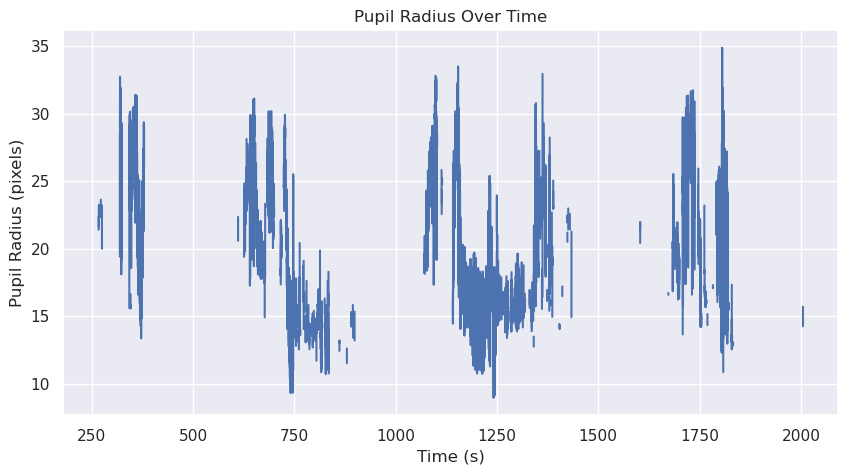

In [3]:
# Plot the pupil radius over time
pupil_raw_radius = nwb.acquisition["PupilTracking"]["pupil_raw_radius"]
timestamps = pupil_raw_radius.timestamps[:]
data = pupil_raw_radius.data[:]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, data)
plt.xlabel("Time (s)")
plt.ylabel("Pupil Radius (pixels)")
plt.title("Pupil Radius Over Time")
plt.show()

The above plot shows pupil radius over time.  The pupil radius appears to fluctuate between approximately 10 and 35 pixels. There appear to be several repeating sections over time, where there is a rapid radius spike, followed by multiple fluctuations down to 15, then a slow decreasing trend over time.

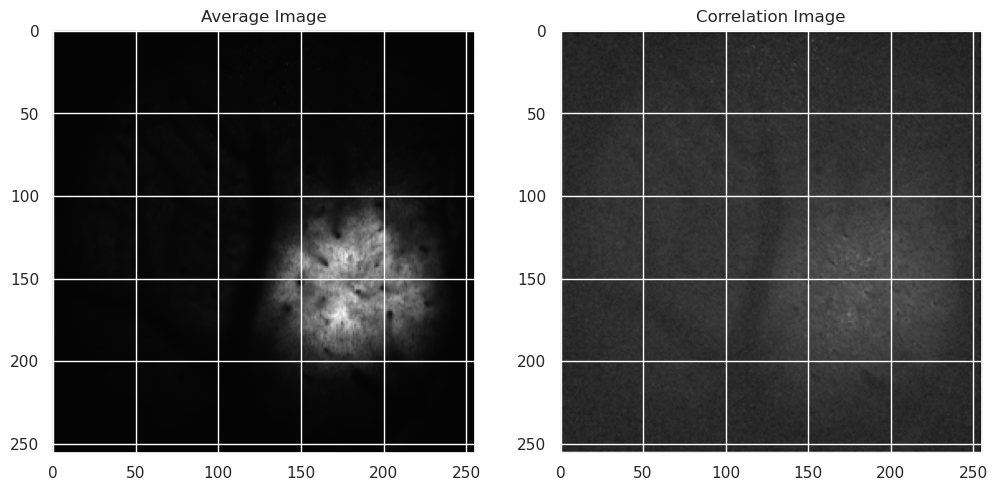

In [4]:
# Plot the average and correlation images
average = nwb.processing["ophys"]["SummaryImages_chan1"]["average"].data[:]
correlation = nwb.processing["ophys"]["SummaryImages_chan1"]["correlation"].data[:]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(average, cmap="gray")
plt.title("Average Image")

plt.subplot(1, 2, 2)
plt.imshow(correlation, cmap="gray")
plt.title("Correlation Image")

plt.show()

The average and correlation images for channel 1 are displayed above. The average image shows a dark background with a bright, somewhat irregular region in the center-right portion. The correlation image appears more uniformly gray with subtle variations in intensity, giving it a slightly grainy texture.

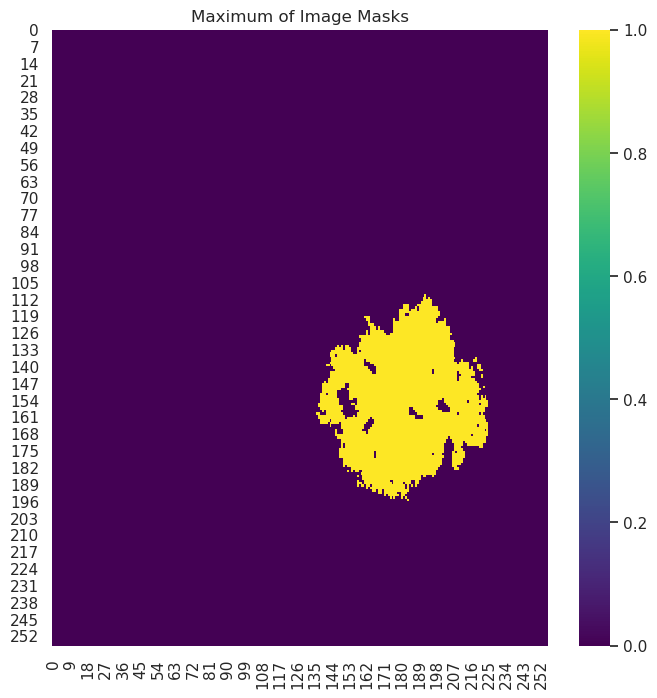

In [5]:
# Plot the image masks
image_mask = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation1"]["image_mask"].data[:]
# Take the maximum across the first dimension (all masks)
max_image_mask = np.max(image_mask, axis=0)

plt.figure(figsize=(8, 8))
sns.heatmap(max_image_mask, cmap="viridis")
plt.title("Maximum of Image Masks")
plt.show()

The heatmap of the maximum of the image masks is displayed above. The data is mostly around 0, but increases around the coordinates (150,180), where it peaks and is represented by yellow.

## Examples of Common Analyses

This section provides examples of common analyses that might be relevant to the dataset's content.
These examples are meant to guide the user and provide a starting point for their own analyses.

Example 1: Calculate the mean fluorescence for each ROI over time
Example 2: Analyze the relationship between pupil size and ACh activity
Example 3: Analyze the relationship between treadmill velocity and ACh activity
